# T1 Introducción

**Índice**

> 1 Definición de aprendizaje automático<br>
>
> 2 Aprendizaje supervisado<br>
>> 2.1 Clasificación<br>
>>> 2.1.1 Ejemplo: clasificación de flores iris<br>
>>> 2.1.2 Análisis exploratorio de datos<br>
>>> 2.1.3 Aprendizaje de un clasificador<br>
>>> 2.1.4 Minimización del riesgo empírico<br>
>>> 2.1.5 Incertidumbre<br>
>>> 2.1.6 Estimación por máxima verosimilitud<br>
>>
>> 2.2 Regresión<br>
>>> 2.2.1 Regresión lineal<br>
>>> 2.2.2 Regresión polinómica<br>
>>> 2.2.3 Redes neuronales profundas<br>
>>
>> 2.3 Sobre-entrenamiento y generalización<br>
>> 2.4 El teorema *no free lunch*<br>
>
> 3 Aprendizaje no supervisado<br>
>> 3.1 Clustering<br>
>> 3.2 Descubriendo "factores de variación" latentes<br>
>> 3.3 Evaluación del aprendizaje no supervisado<br>
>
> 4 Aprendizaje por refuerzo<br>
>
> 5 Datos<br>
>> 5.1 Algunos conjuntos de imágenes comunes<br>
>>> 5.1.1 MNIST<br>
>>> 5.1.2 EMNIST<br>
>>> 5.1.3 Fashion-MNIST<br>
>>> 5.1.4 CIFAR-10 y CIFAR-100<br>
>>> 5.1.5 ImageNet<br>
>>
>> 5.2 Algunos conjuntos de texto comunes<br>
>>> 5.2.1 Clasificación de texto<br>
>>> 5.2.2 Traducción automática<br>
>>> 5.2.3 Otras tareas seq2seq<br>
>>> 5.2.4 Modelado del lenguaje<br>
>>
>> 5.3 Preproceso de datos de entrada discretos<br>
>>> 5.3.1 Codificación one-hot<br>
>>> 5.3.2 Cruce de variables<br>
>>
>> 5.4 Preproceso de texto<br>
>>> 5.4.1 El modelo bolsa de palabras<br>
>>> 5.4.2 Representación TF-IDF<br>
>>> 5.4.3 Word embeddings<br>
>>> 5.4.4 Palabras fuera de vocabulario<br>
>>
>> 5.5 Datos perdidos<br>
>
> 6 Discusión<br>
>> 6.1 El aprendizaje automático y otras áreas<br>
>> 6.2 Consideraciones

# 1 Definición de aprendizaje automático

**Arthur Samuel (1959):** $\;$ campo de estudio que da a los ordenadores la habilidad de aprender sin ser explícitamente programados

**Tom Mitchell (1997):** $\;$ un sistema aprende de la experiencia E respecto a una clase de tareas T y una medida de rendimiento R, si su rendimiento en T, medido por R, mejora con E

**Kevin Murphy (2022):**
* Hay muchos tipos de ML según Mitchell, dependiendo de la naturaleza de T, R y E
* Los tipos usuales de ML pueden tratarse convenientemente desde una perspectiva probabilística (estadística)
* La aproximación probabilística es óptima para la toma de decisiones bajo incertidumbre y enmarca formalmente el ML junto con muchas otras áreas científicas e ingenieriles

<p style="page-break-after:always;"></p>

# 2 Aprendizaje supervisado

**Aprendizaje supervisado:** $\;$ forma de ML más común

**Tarea T:** $\;$ consiste en aprender una transformación $f:\mathcal{X}\to\mathcal{Y}$ donde
* **Entradas $\boldsymbol{x}\in\mathcal{X}$:** $\;$ suelen ser un vector de $D$ características reales $\mathcal{X}=\mathbb{R}^D$
* **Salidas $\boldsymbol{y}\in\mathcal{Y}$:** $\;$ suelen ser etiquetas de clase o reales

**Experiencia E:** $\;$ dada por un **conjunto de entrenamiento** $\,\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}_{n=1}^N$
* $N$ es el **tamaño de la muestra**
* También es usual referirnos a cada par $(\boldsymbol{x}_n,\boldsymbol{y}_n)$ como **muestra (de entrenamiento)**

**Medida de rendimiento P:** $\;$ depende del tipo de salida

## 2.1 Clasificación

**Problema de clasificación:** $\;$ el espacio de salida es un conjunto de $C$ **etiquetas de clases,** $\;\mathcal{Y}=\{1,2,\dotsc,C\}$

**Reconocimiento de formas (pattern recognition):** $\;$ predicción de la etiqueta de clase de una entrada dada

**Clasificación binaria:** $\;$ caso particular en el que solo tenemos dos clases, $\,y\in\{0,1\}\,$ o $\,y\in\{-1,+1\}$

<p style="page-break-after:always;"></p>

### 2.1.1 Ejemplo: clasificación de flores iris

**Clasificación de flores iris de las especies setosa, versicolor y virgínica:** $\;$ ejemplo clásico en clasificación estadística

<center>

| Setosa                      | Versicolor                      | Virgínica                      |
| --------------------------- | ------------------------------- | ------------------------------ |
| <img src="Figure_1.1_A.png" width="150"/> | <img src="Figure_1.1_B.png" width="150"/> | <img src="Figure_1.1_C.png" width="150"/> |

</center>

**Espacio de entrada:** $\;\mathcal{X}$ es un conjunto de imágenes que, por lo general, es de dimensión muy elevada
* *Ejemplo:* $\;\mathcal{X}=\mathbb{R}^D$ con $D=C\times D_1\times D_2\,$ para una imagen a color con $C=3$ canales y $D_1\times D_2$ píxeles
* **Aprendizaje de $f:\mathcal{X}\to\mathcal{Y}$:** $\,$ es muy difícil, si bien ciertos modelos avanzados consiguen aprender $f$ en algunas tareas

**Conocimiento a priori:** $\;$ conocimiento previo sobre la tarea que permite simplificarla
* **Iris:** la longitud y amplitud de sépalos y pétalos es altamente discriminativa, por lo que podemos trabajar con un espacio de entrada de dimensión mucho más reducida que el de las imágenes originales, $\mathcal{X}=\mathbb{R}^4$

**Datos tabulados o matriz de datos:** $\;$ matriz de $N$ datos ($N$ filas) y $D$ características junto con las etiquetas de clase ($D+1$ columnas)

<p style="page-break-after:always;"></p>

**Corpus iris:** $\;$ matriz de $N=150$ muestras descritas con $D=4$ características junto con las etiquetas de clase ($50$ por clase)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = pd.Series(iris.target_names[iris.target], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<p style="page-break-after:always;"></p>

### 2.1.2 Análisis exploratorio de datos

**Análisis exploratorio de datos:** $\;$ estudio preliminar de los datos de un problema de ML para familiarizarse con el mismo

**Detección de patrones obvios en los datos:** $\;$ si los hay, para hacerse una idea de la dificultad del problema y, en definitiva, de qué resultados podemos esperar con diferentes métodos (p.e. lineales o no)

**Detección de problemas obvios con los datos:**
* **Outliers:** $\;$ datos con características o etiquetas **perdidas** o **incorrectas** (p.e. por encontrarse fuera de dominio)
* **Label noise (etiquetas dudosas):** $\;$ dayos cuyas etiquetas de clase no están claras

<p style="page-break-after:always;"></p>

**Inspección visual:** $\;$ análisis exploratorio de datos mediante representación gráfica de los mismos (si $D$ es reducida)

**Gráfico de pares (pair plot):** $\;$ matriz de $D\times D$ gráficos para características individuales (en la diagonal) y a pares (fuera)

**Ejemplo:** $\;$ gráfico de pares para iris; setosa se separa linealmente; setosa y virgínica también se separan bastante bien

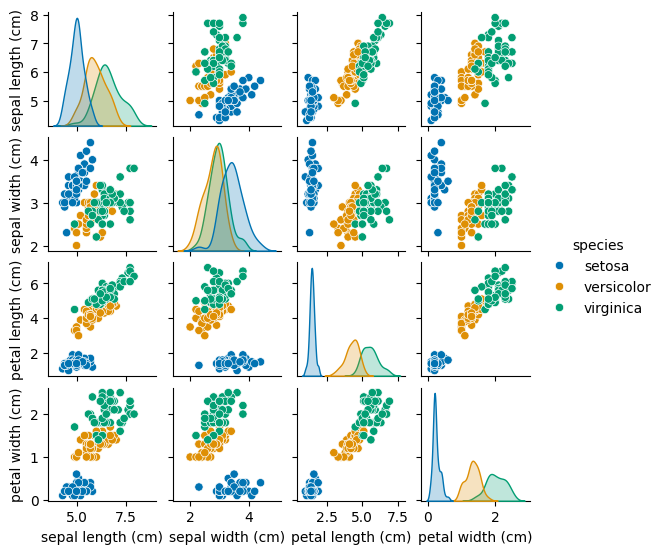

In [2]:
import seaborn as sns
sns.pairplot(data, hue="species", height = 1.4, palette = 'colorblind');

<p style="page-break-after:always;"></p>

**Reducción de la dimensión:** $\;$ si la dimensión $D$ es elevada, existen técnicas para reducirla y visualizar los datos en 2d o 3d

**Ejemplo:** reducción de imagénes $8\times 8$ de dígitos manuscritos a 2d para examinar cómo se separa cada clase del resto

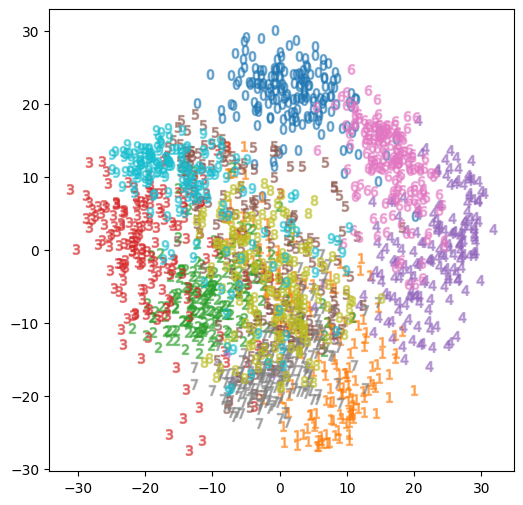

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
X2d = PCA(n_components=2).fit_transform(digits.data)
plt.figure(figsize=(6, 6))
colors = cm.tab10(np.linspace(0, 1, 10))
for digit in digits.target_names:
    plt.scatter(*X2d[digits.target == digit].T, marker=f"${digit}$", s=50, alpha=0.5, color=colors[digit])

<p style="page-break-after:always;"></p>

### 2.1.3 Aprendizaje de un clasificador

**Aprendizaje de un clasificador o regla de decisión $\,f(\boldsymbol{x};\boldsymbol{\theta})$:** $\;$ suele reducirse a escoger un valor para el $\boldsymbol{\theta}$ que lo gobierna

**Efecto de un clasificador:** $\;$ particiona el espacio de entrada en **regiones de decisión** separadas por **fronteras de decisión**

**Ejemplo:** regla decisión sencilla para distinguir setosa de no-setosa en iris usando la longitud de pétalo ($x$)
$$f(\boldsymbol{x};\boldsymbol{\theta})=\left\{\begin{array}{l}%
\text{setosa si $x\leq 2.45$}\\
\text{versicolor o virgínica si no}
\end{array}\right.$$
En esta regla tenemos parámetros $\boldsymbol{\theta}=(2.45)$, frontera $x=2.45$, y regiones $\mathcal{R}_{\text{setosa}}=\{x\leq 2.45\}$ y $\mathcal{R}_{\text{no-setosa}}=\{x>2.45\}$.

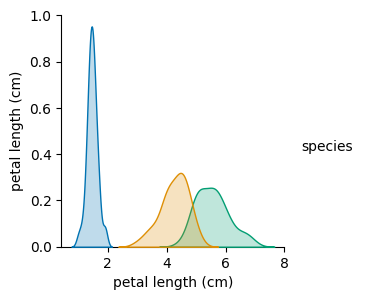

In [4]:
sns.pairplot(data, vars = data.columns[2:3], hue="species", height = 3, palette = 'colorblind');

<p style="page-break-after:always;"></p>

**Ejemplo (cont.):** refinamiento de la regla anterior mediante particionamiento recursivo de regiones para construir un **árbol de decisión;** aquí solo añadimos una sub-regla para particionar la región no-setosa en versicolor y virgínica según la anchura de pétalo

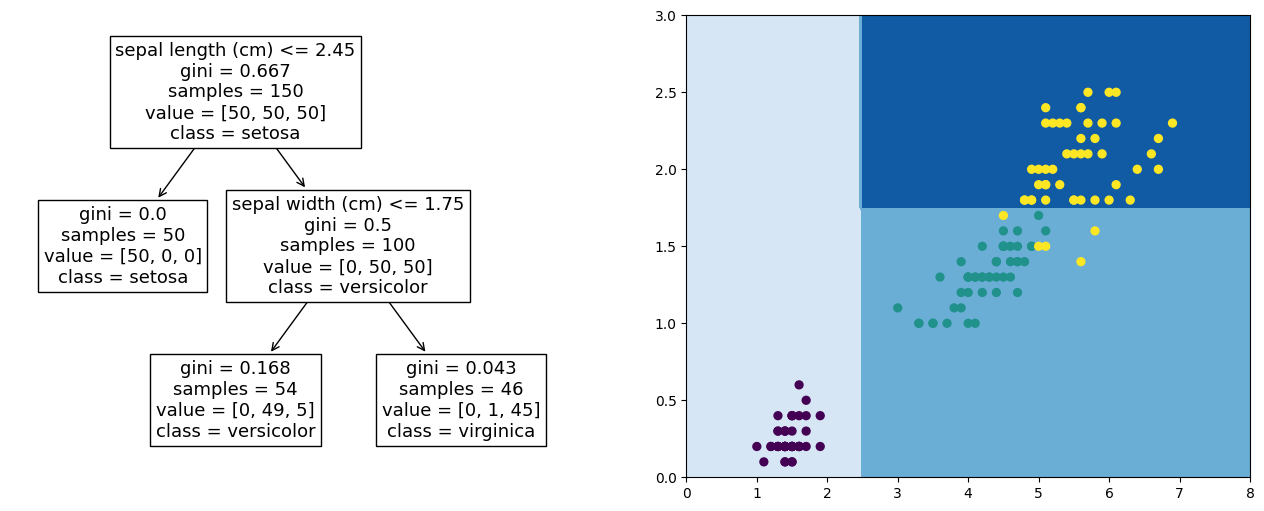

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = iris.data[:, [2, 3]]; y = iris.target
dt = DecisionTreeClassifier(max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, ax=axes[0], fontsize=13);
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=32);

<p style="page-break-after:always;"></p>

### 2.1.4 Minimización del riesgo empírico

**Tasa de error (en entrenamiento):** $\;$ medida de rendimiento obvia para aprender el $\boldsymbol{\theta}$ de un clasificador
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum\nolimits_ {n=1}^N\mathbb{I}(y_n\neq f(\boldsymbol{x}_n;\boldsymbol{\theta}))
\quad\text{con}\quad%
\mathbb{I}(\text{cierto})=1,\;\mathbb{I}(\text{falso})=0$$

**Riesgo empírico:** $\;$ generaliza la tasa de error mediante la introducción de una **función de pérdida** $\ell(y,\hat{y})$ para medir la pérdida (coste) producida al clasificar una muestra de la clase $y$ en la clase $\hat{y}$
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum\nolimits_ {n=1}^N\ell(y_n, f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Pérdida 01:** $\;\ell_{01}(y,\hat{y})=\mathbb{I}(y\neq\hat{y})$, particulariza el riesgo empírico a la tasa de error

**Funciones de pérdida usuales:** $\;$ parecidas a la 01, aunque no la 01 exactamente, para facilitar el aprendizaje

**Errores de diferentes costes:** $\;$ otro motivo obvio para usar pérdidas distintas a la 01

**Ejemplo:** pérdida con costes distintos en iris; suponemos que setosa y versicolor son comestibles, pero virginica no, por lo que confundir una virgínica por una setosa o versicolor tiene mayor coste que cualquier otra confusión
\begin{align*}
\ell(y,\hat{y})   && \text{setosa} && \text{versicolor} && \text{virginica}\\\hline%
\text{setosa}     &&             0 &&                 1 &&       1\\%
\text{versicolor} &&             1 &&                 0 &&       1\\%
\text{virginica}  &&            10 &&                10 &&       0\\\hline%
\end{align*}

**Minimización del riesgo empírico:** $\;$ es la aproximación básica al **entrenamiento o ajuste del modelo**
$$\hat{\boldsymbol{\theta}}=\operatorname*{argmin}_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta})=\operatorname*{argmin}_{\boldsymbol{\theta}} \frac{1}{N}\sum\nolimits_{n=1}^N\ell(y_n,f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Generalización óptima:** $\;$ queremos minimizar la pérdida esperada sobre datos futuros todavía no vistos, esto es, queremos que el modelo generalice lo mejor posible, no que simplemente funcione bien con los datos de entrenamiento

<p style="page-break-after:always;"></p>

### 2.1.5 Incertidumbre

**Imposibilidad de aprender clasificadores libres de error:** $\;$ a causa de dos fuentes de incertidumbre
* **Incertidumbre epistémica o de modelo:** $\;$ falta de conocimiento sobre la transformación entrada-salida
* **Incertidumbre aleatórica o de datos:** $\;$ estocasticidad intrínseca e irreducible en la transformación; p.e. datos de clases distintas y mismo $\boldsymbol{x}$

**Predicción de una distribución de probabilidad sobre las clases en lugar de una sola clase:** $\;$ aproximación usual para capturar la incertidumbre
$$p(y=c\mid \boldsymbol{x}; \boldsymbol{\theta})=f_c(\boldsymbol{x}; \boldsymbol{\theta})%
\qquad\text{donde}\qquad%
f:\mathcal{X}\to[0, 1]^C, \quad 0\leq f_c\leq 1, \quad \sum_c f_c=1$$

**Softmax:** $\;$ función de ayuda típica para el aprendizaje de $f$ sujeto a las restricciones usuales de probabilidad
$$\mathcal{S}:\mathbb{R}^C\to[0,1]^C\qquad\text{definida como}\qquad%
S(\boldsymbol{a})=\frac{1}{\sum_c e^{a_c}}(e^{a_1},\dotsc,e^{a_C})^t$$
* **Logits:** $\;\boldsymbol{a}$ pueden interpretarse como un vector de log-probabilidades no normalizadas
* **Logits normalizados:** $\;$ la softmax normaliza los logits para que cumplan las restricciones de probabilidad
* **Uso:** $\;f$ puede ser cualquier función de la entrada que nos convenga, no sujeta a las restricciones de probabilidad

**Regresión logística (multiclase):** $\;$ modelo que usa la softmax con logits calculados como afinidad de la entrada
$$f(\boldsymbol{x}; \mathbf{W}, \boldsymbol{b})=\mathbf{W}^t\boldsymbol{x}+\boldsymbol{b}%
\qquad\text{con}\qquad%
\mathbf{W}=(\boldsymbol{w}_1,\dotsc,\boldsymbol{w}_C)\in\mathbb{R}^{D\times C},\quad\boldsymbol{b}\in\mathbb{R}^C$$
* **Pesos o coeficientes de regresión:** $\;\boldsymbol{w}_c$ (para cada clase $c$)
* **Sesgo u ordenada en origen (intercept):** $\;b_c$ (para cada clase $c$)
* **Notación homogénea o compacta:** $\;$ por simplicidad, para que los sesgos queden absorbidos por la matriz de pesos
$$f(\tilde{\boldsymbol{x}}; \tilde{\mathbf{W}})=\tilde{\mathbf{W}}^t\tilde{\boldsymbol{x}}%
\qquad\text{con}\qquad%
\tilde{\mathbf{W}}=\begin{pmatrix}\boldsymbol{b}^t\\\mathbf{W}\end{pmatrix}\in\mathbb{R}^{(1+D)\times C}, %
\quad\tilde{\boldsymbol{x}}=(1, \boldsymbol{x})^t\in\mathbb{R}^{1+D}$$


<p style="page-break-after:always;"></p>

### 2.1.6 Estimación por máxima verosimilitud

**Los-pérdida o neg-log-probabilidad:** $\;$ función de pérdida usual para el ajuste de modelos probabilísticos
$$\ell(y, f(\boldsymbol{x}; \boldsymbol{\theta}))=-\log p(y\mid f(\boldsymbol{x}; \boldsymbol{\theta}))$$
* Si el modelo asigna probabilidad uno a la clase correcta, la pérdida es nula;
* Si no, la pérdida será positiva y será tanto mayor cuanto menor sea la probabilidad asignada a la clase correcta

**Neg-log-verosimilitud (NLL):** $\;$ riesgo empírico con log-pérdida
$$\operatorname{NLL}(\boldsymbol{\theta})%
=-\frac{1}{N}\sum_n \log p(y_n\mid f(\boldsymbol{x}_n; \boldsymbol{\theta}))$$

**Estimador máximo-verosímil (MLE):** $\;$ vector de parámetros que minimiza la NLL
$$\hat{\boldsymbol{\theta}}_{\text{mle}}%
=\operatorname*{argmin}_{\boldsymbol{\theta}}\;\operatorname{NLL}(\boldsymbol{\theta})$$
* El MLE se utiliza muy frecuentemente para ajustar modelos a partir de datos de entrenamiento

<p style="page-break-after:always;"></p>

**Ejemplo:** regresión logística aplicada a iris usando la longitud y anchura de pétalos

W= [[ 11.12427971   3.22544055 -14.34972026]
 [ -2.7476411    0.08364114   2.66399996]
 [ -1.1703017   -0.90695071   2.07725241]]


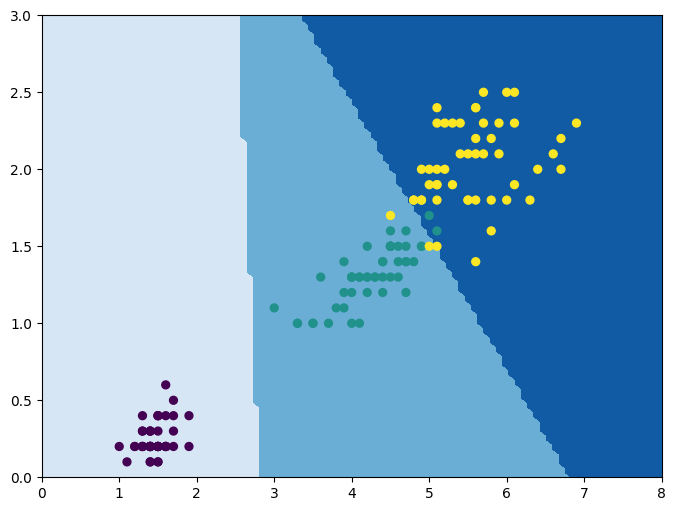

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = iris.data[:, [2, 3]]; y = iris.target
rl = LogisticRegression().fit(X, y)
print("W=", np.vstack((rl.intercept_, rl.coef_.T)))
fig = plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = rl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = plt.contourf(xx, yy, Z, 2, cmap='Blues'); plt.scatter(*X.T, c=y, s=32);

<p style="page-break-after:always;"></p>

## 2.2 Regresión

**Problema de regresión:** $\;$ la salida es un real $y\in\mathbb{R}$ en lugar de una etiqueta de clase $y\in\{1,\dotsc,C\}$, como ocurre en clasificación

**Función de pérdida usual:** $\;$ la **pérdida cuadrática o L2**
$$\ell_2(y,\hat{y})=(y-\hat{y})^2$$

**Residuo:** $\;$ diferencia entre observación y predicción, $y-\hat{y}$

**Error cuadrático medio (MSE, mean squared error):** $\;$ riesgo empírico con pérdida cuadrática
$$\operatorname{MSE}(\boldsymbol{\theta})=\frac{1}{N}\sum_n (y_n-f(\boldsymbol{x}_n; \boldsymbol{\theta}))^2$$

**Distribución normal o Gaussiana:** $\;$ modelo probabilístico que suele usarse para capturar la incertidumbre
$$p(y\mid \boldsymbol{x}; \boldsymbol{\theta})%
=\mathcal{N}(y\mid \mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[{-\frac{1}{2\sigma^2}(y-\mu)^2}\right]%
\qquad\text{con}\qquad%
\mu=f(\boldsymbol{x}; \boldsymbol{\theta})%
\quad\text{y}\quad%
\sigma^2\;\text{fija}$$

**NLL proporcional al MSE:** $\;$ por lo que el MLE de $\boldsymbol{\theta}$ también minimiza el MSE
$$\begin{align*}\operatorname{NLL}(\boldsymbol{\theta})%
&=-\frac{1}{N}\sum_n\log\left[\left(2\pi\sigma^2\right)^{-\frac{1}{2}}%
\exp\left(-\frac{1}{2\sigma^2}(y_n-f(\boldsymbol{x}_n; \boldsymbol{\theta}))^2\right)\right]\\%
&=\frac{1}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}\frac{1}{N}\sum_n (y_n-f(\boldsymbol{x}_n; \boldsymbol{\theta}))^2\\%
&=\operatorname{const}+\frac{1}{2\sigma^2}\operatorname{MSE}(\boldsymbol{\theta})
\end{align*}$$

**Regresión simple y múltiple:** $\;$ simple si la entrada es unidimensional, $x\in\mathbb{R}$; si no, múltiple

<p style="page-break-after:always;"></p>

### 2.2.1 Regresión lineal

**Regresión lineal simple (1d):** $\;$ predice la salida esperada mediante una recta de parámetros $\,\boldsymbol{\theta}=(b ,w)$
$$f(x;\boldsymbol{\theta})=b+wx$$
* $w$ es la **pendiente** de la recta
* $b$ es el **desplazamiento u ordenada en origen**
* El ajuste de ambos parámetros mediante minimización del MSE conduce a una solución de **mínimos cuadrados**

**Ejemplo:** $\;$ regresión lineal simple con datos sintéticos
$$p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid \mu, \sigma^2)
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4$$

w =  [-4.35089704  0.53773872]


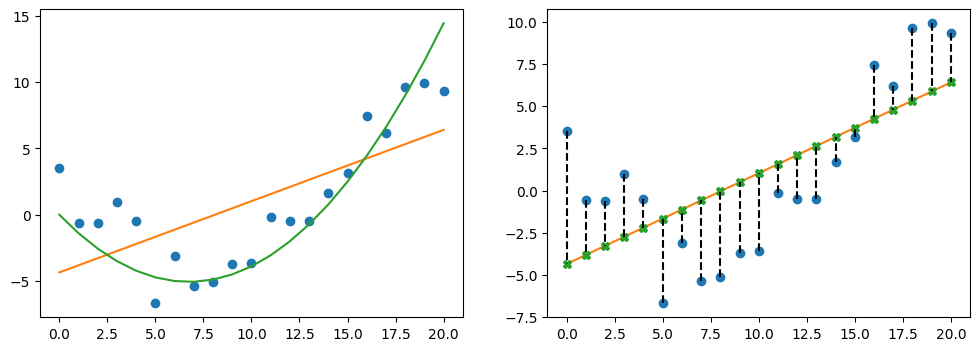

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2
X = np.linspace(0.0, 20, N)
y_mean = np.dot(w[0], X) + np.dot(w[1], np.square(X)) 
y = y_mean + np.random.normal(0, sigma, N)
X1 = np.c_[np.ones((N, 1)), X]
w = np.linalg.lstsq(X1, y, rcond=None)[0]; y_pred = X1 @ w
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes[0]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_mean, '-')
ax = axes[1]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_pred, 'X');
for x0, y0, y_hat in zip(X, y, y_pred):
    ax.plot([x0, x0], [y0, y_hat], 'k--')

<p style="page-break-after:always;"></p>

**Regresión lineal múltiple (2d+):** predice la salida esperada mediante una combinación lineal de las entradas:
$$f(\boldsymbol{x};\boldsymbol{\theta})=b+w_1x_1+\cdots+w_Dx_D=b+\boldsymbol{w}^t\boldsymbol{x}$$
* Como en regresión lineal 1d, el ajuste de parámetros mediante minimización del MSE conduce a una solución de **mínimos cuadrados**

**Ejemplo:** $\,$ predicción de temperatura en función de la localización 2d en una sala, $f(\boldsymbol{x};\boldsymbol{\theta})=b+w_1x_1+w_2x_2$

In [8]:
import numpy as np
from scipy.io import loadmat
import requests
from io import BytesIO
url = "https://raw.githubusercontent.com/probml/probml-data/main/data/moteData/moteData.mat"
data = loadmat(BytesIO(requests.get(url).content))
X, y = data["X"], data["y"]; N = X.shape[0]
print(np.hstack((X, y))[:3, :])

[[21.5    23.     17.8618]
 [24.5    20.     18.2146]
 [19.5    19.     18.0284]]


w =  [1.64141259e+01 1.37458660e-02 3.72170281e-03]


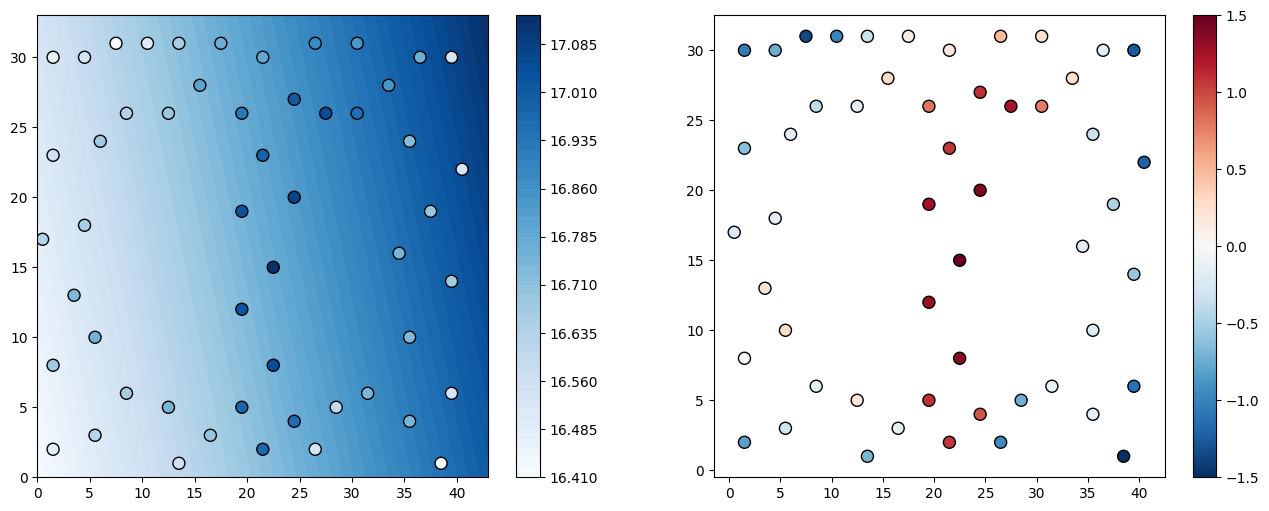

In [9]:
import matplotlib.pyplot as plt
X1 = np.c_[np.ones((N, 1)), X]
w = np.linalg.lstsq(X1, y, rcond=None)[0].squeeze()
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(16, 6))
xx, yy = np.meshgrid(np.linspace(0, 43, num=100), np.linspace(0, 33, num=100))
z = lambda x: w[0] + np.dot(w[1:], x)
zz = np.apply_along_axis(z, 1, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax = axes[0]; cp = ax.contourf(xx, yy, zz, 50, cmap='Blues'); plt.colorbar(cp, ax=ax)
ax.scatter(*X.T, c=y.reshape(1, -1), cmap='Blues', edgecolors='black', s=75); 
ax = axes[1]; res = y - np.apply_along_axis(z, 1, X).reshape(-1, 1) # residuos
sp = ax.scatter(*X.T, c=res, cmap='RdBu_r', edgecolors='black', s=75, vmin=-1.5, vmax=1.5)
plt.colorbar(sp, ax=ax);

<p style="page-break-after:always;"></p>

### 2.2.2 Regresión polinómica

**Regresión polinómica simple de grado $G$:** $\,$ predice la salida esperada mediante una combinación lineal de las entradas previamente transformadas con una **función base polinómica de grado $G$**
$$f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{\phi}(x)%
\qquad\text{donde}\qquad%
\boldsymbol{\phi}(x)=(1,x,x^2,\dotsc,x^G)$$

**Extracción o ingeniería de características:** $\;$ rol de $\boldsymbol{\phi};\,$ técnicamente, se trata de un caso particular de regresión lineal múltiple

**Ejemplo (cont.):** $\;$ regresión polinómica simple con datos sintéticos
$$p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid \mu, \sigma^2)
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4$$

w =  [ 1.97649843 -1.46038617  0.09990624]


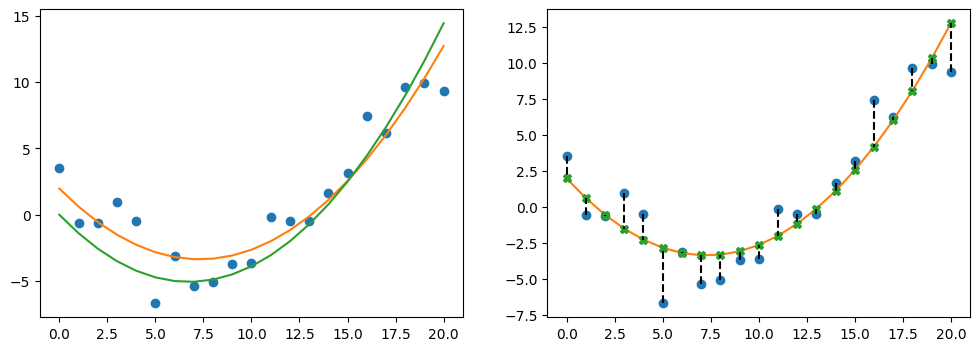

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2
X = np.linspace(0.0, 20, N)
y_mean = np.dot(w[0], X) + np.dot(w[1], np.square(X))
y = y_mean + np.random.normal(0, sigma, N)
X1 = np.c_[np.ones((N, 1)), X]
G = 2 # <<< escoge grado
for g in np.arange(2, G+1):
    X1 = np.hstack((X1, pow(X, g).reshape(-1, 1)))
w = np.linalg.lstsq(X1, y, rcond=None)[0]; y_pred = X1 @ w
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes[0]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_mean, '-')
ax = axes[1]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_pred, 'X');
for x0, y0, y_hat in zip(X, y, y_pred):
    ax.plot([x0, x0], [y0, y_hat], 'k--')

<p style="page-break-after:always;"></p>

**Regresión polinómica múltiple de grado $G$:** $\;$ generaliza la simple mediante una función base polinómica de grado $G$ **múltiple**
$$f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{\phi}(\boldsymbol{x})%
\qquad\text{donde}\qquad%
\boldsymbol{\phi}(\boldsymbol{x})=(1,x_1,\dotsc,x_D,x_1^2,x_1x_2,\dotsc,x_D^2,x_1^3,\dotsc,x_D^G)$$
* Al igual que regresión polinómica simple de grado $G$, técnicamente se trata de un caso particular de regresión lineal múltiple

**Ejemplo (cont.):** $\;$ predicción de temperatura en función de la localización 2d en una sala
$$f(\boldsymbol{x};\boldsymbol{\theta})=b+w_1x_1+w_2x_2+w_3x_1^2+w_4x_2^2$$

w =  [ 1.44583001e+01  1.97176089e-01  1.73554412e-01 -4.53576130e-03
 -5.19514810e-03]


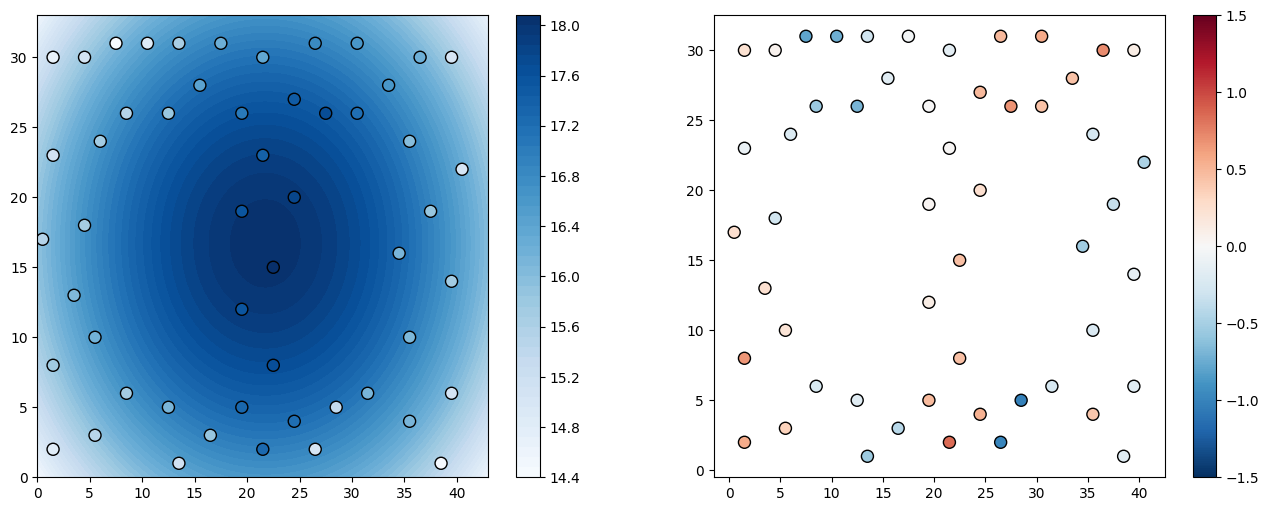

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import requests
from io import BytesIO
url = "https://raw.githubusercontent.com/probml/probml-data/main/data/moteData/moteData.mat"
data = loadmat(BytesIO(requests.get(url).content))
X, y = data["X"], data["y"]; N = X.shape[0]
X1 = np.c_[np.ones((N, 1)), X, np.square(X)]
w = np.linalg.lstsq(X1, y, rcond=None)[0].squeeze()
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(16, 6))
xx, yy = np.meshgrid(np.linspace(0, 43, num=100), np.linspace(0, 33, num=100))
z = lambda x: w[0] + np.dot(w[1:], x)
Z = np.c_[xx.ravel(), yy.ravel()]; ZZ = np.c_[Z, np.square(Z)]
zz = np.apply_along_axis(z, 1, ZZ).reshape(xx.shape)
ax = axes[0]; cp = ax.contourf(xx, yy, zz, 50, cmap='Blues'); plt.colorbar(cp, ax=ax)
ax.scatter(*X.T, c=y.reshape(1, -1), cmap='Blues', edgecolors='black', s=75); 
ax = axes[1]; res = y - np.apply_along_axis(z, 1, X1[:, 1:]).reshape(-1, 1) # residuos
sp = ax.scatter(*X.T, c=res, cmap='RdBu_r', edgecolors='black', s=75, vmin=-1.5, vmax=1.5);
plt.colorbar(sp, ax=ax);

<p style="page-break-after:always;"></p>

### 2.2.3 Redes neuronales profundas

**Redes neuronales profundas (DNNs, deep neural networks):** $\;$ introducen funciones base más generales, con parámetros propios
* **Descomposición recursiva de la extracción de características:** $\;$ con una pila de $L$ funciones o **capas** anidadas
$$f(\boldsymbol{x};\boldsymbol{\theta})=f_L(f_{L-1}(\cdots f_1(\boldsymbol{x})\cdots))$$
* **Parámetros de las capas:** $\;$ cada capa $\ell$ se define con un subconjunto de parámetros $\boldsymbol{\theta}_{\ell}\,$ (o sin parámetros, $\boldsymbol{\theta}_{\ell}=\emptyset$)
$$f_{\ell}(\boldsymbol{x})=f_{\ell}(\boldsymbol{x};\boldsymbol{\theta}_{\ell})$$
* **Capa final:** $\;$ definida a partir del extractor de características aprendido, $f_{1:L-1}(\boldsymbol{x})$
$$f_L(\boldsymbol{x})=\boldsymbol{w}^t\,f_{1:L-1}(\boldsymbol{x})$$

**Redes neuronales convolucionales (CNNs):** $\;$ DNNs adaptadas para imágenes

**Redes neuronales recurrentes (RNNs):** $\;$ DNNs adaptadas para secuencias

<p style="page-break-after:always;"></p>

## 2.3 Sobre-entrenamiento y generalización

**Sobre-entrenamiento de un modelo:** $\;$ su riesgo con datos vistos (en entrenamiento) es mucho menor que con no vistos
* En general, todo modelo suficientemente flexible (complejo) tiende a sobre-entrenarse

**Riesgo empírico:** $\;$ esto es, con respecto a los datos de entrenamiento
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{train}})%
=\frac{1}{\lvert\mathcal{D}_{\text{train}}\rvert}%
\sum_ {(\boldsymbol{x},\boldsymbol{y})\in\mathcal{D}_{\text{train}}} %
\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))$$

**Riesgo teórico (poblacional):** $\;$ esto es, con respecto a la distribución conjunta **real y desconocida** de $\boldsymbol{x}$ e $\boldsymbol{y}$, $\,p^*(\boldsymbol{x},\boldsymbol{y})$
$$\mathcal{L}(\boldsymbol{\theta}; p^*)%
=\mathbb{E}_{p^*(\boldsymbol{x},\boldsymbol{y})}[\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))]$$

**Riesgo en test:** $\;$ aproximación del teórico con un **conjunto de test,** esto es, de datos no vistos (p.e. separados de $\mathcal{D}_{\text{train}}$)
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{test}})%
=\frac{1}{\lvert\mathcal{D}_{\text{train}}\rvert}%
\sum_ {(\boldsymbol{x},\boldsymbol{y})\in\mathcal{D}_{\text{test}}} %
\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))$$

**Gap de generalización:** $\;$ diferencia entre el riesgo en test y entrenamiento
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{test}})-\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{train}})$$

<p style="page-break-after:always;"></p>

**Evaluación del sobreajuste de un modelo:** $\;$ suele hacerse en función del gap de generalización; si es alto, el modelo se halla sobreajustado (demasiado complejo)

**Modelos subajustados:** $\;$ si el gap es reducido, pero el riesgo (empírico y en test) es alto (en comparación con otros modelos), posiblemente nos hallamos ante un modelo subjustado (demasiado sencillo)

**Ejemplo (cont.):** $\;$ regresión polinómica simple con datos sintéticos; MSE en training y test en función del grado
$$p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid \mu, \sigma^2)
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4$$

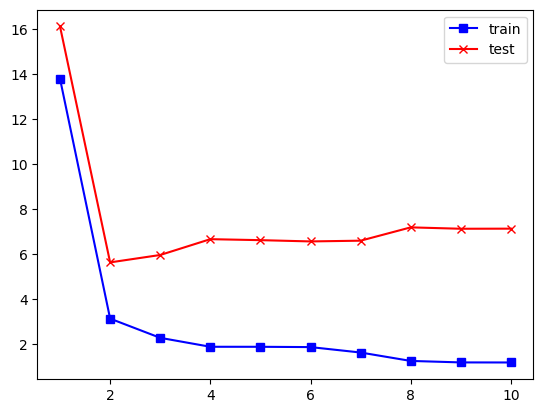

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2
X_train = np.linspace(0.0, 20, N)
M = 210 # datos de test sintetizados
X_test = np.linspace(0.0, 20, M)
X = np.concatenate((X_train, X_test))
y_mean = np.dot(w[0], X) + np.dot(w[1], np.square(X))
y = y_mean + np.random.normal(0, sigma, N + M)
X1 = np.ones((N + M, 1)); y_train = y[:N]; y_test = y[N:]
G = 10; gg = np.arange(1, G + 1); mse = np.zeros((G + 1, 2))
for g in gg:
    X1 = np.hstack((X1, pow(X, g).reshape(-1, 1)))
    X_train = X1[:N]; X_test = X1[N:]
    w = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
    mse[g, 0] = np.square(y_train - X_train @ w).sum() / N
    mse[g, 1] = np.square(y_test - X_test @ w).sum() / M
plt.plot(gg, mse[1:, 0], color='b', marker='s', label='train')
plt.plot(gg, mse[1:, 1], color='r', marker='x', label='test'); plt.legend();

**Riesgo en validación:** $\;$ en la práctica, la selección de un modelo adecuado no se hace con el test, sino con una fracción distinta del training que llamamos **conjunto de validación**

<p style="page-break-after:always;"></p>

## 2.4 El teorema *no free lunch*

**Teorema *no free lunch* (nadie da un duro a cuatro pesetas):** $\;$ no existe un único mejor modelo para todo tipo de problemas
* Esto se debe a que un conjunto de asunciones que funciona bien en un dominio puede no funcionar bien en otro
* Conviene disponer de diversos modelos y técnicas asociadas con las que abordar cada problema nuevo que se presente

**Selección de modelos para un nuevo problema:** $\;$ deberá basarse en conocimiento del dominio, así como en técnicas de estimación del riesgo teórico como **validación cruzada** o **selección de modelos Bayesiana**

<p style="page-break-after:always;"></p>

# 3 Aprendizaje no supervisado

**Aprendizaje no supervisado:** $\;$ trata de "explicar" los datos cuando solo tenemos un conjunto de "entradas", $\mathcal{D}=\{\boldsymbol{x}_n\}_{n=1}^N$, sin sus correspondientes "salidas" $\{\boldsymbol{y}_n\}$

**Aproximación probabilística:** $\;$ ajusta un modelo incondicional $p(\boldsymbol{x})$, en lugar de uno condicional $p(\boldsymbol{y}\mid\boldsymbol{x})$ como en supervisado

**Mayor aplicabilidad:** $\;$ del aprendizaje no supervisado que el supervisado
* Se debe a que los datos no supervisados son fáciles de conseguir; no así la supervisión
* Además, el aprendizaje no supervisado puede aplicarse a tareas mal definidas, pues en principio no requiere disponer de un conjunto de categorías dado, ni siquiera asumir que los datos se agrupan en un cierto número de categorías dado

<p style="page-break-after:always;"></p>

## 3.1 Clustering

**Clustering:** $\:$ área clásica del análisis exploratorio de datos cuyo objetivo es encontrar **agrupamientos naturales** de los datos en grupos homogéneos o **clústers**

**Ejemplo:** $\;$ clustering de iris según longitud y amplitud de pétalos

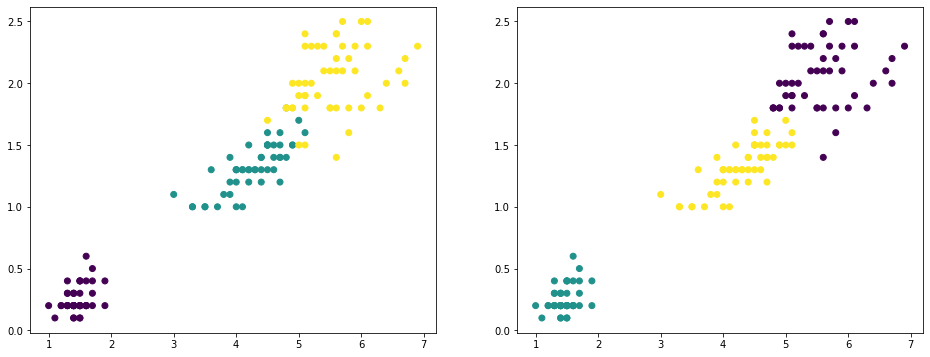

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
iris = load_iris(); X = iris.data[:, [2, 3]]; y = iris.target
K = 3 # <<< escoge número de clústers
y_pred = GaussianMixture(n_components=K, random_state=42).fit(X).predict(X)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].scatter(*X.T, c=y); axes[1].scatter(*X.T, c=y_pred);

<p style="page-break-after:always;"></p>

## 3.2 Descubriendo "factores de variación" latentes

**Reducción de la dimensión:** $\;$ cuando trabajamos con datos de alta dimensión, por lo general resulta útil reducirla mediante una proyección en un espacio de dimensión reducida que capture la "esencia" de los datos

**Factores latentes:** $\;$ asumimos que cada observación $\boldsymbol{x}_n\in\mathbb{R}^D$ se genera a partir de $K\ll D$, factores latentes ocultos, $\boldsymbol{z}_n\in\mathbb{R}^K$
* Como los $\boldsymbol{z}_n$ no se conocen, adoptamos un modelo probabilístico sencillo para $p(\boldsymbol{z}_n)$ como, por ejemplo, una Gaussiana

**Análisis factorial:** $\;$ modelo lineal similar a regresión lineal, salvo que solo observamos las salidas $\boldsymbol{x}_n$; no las entradas $\boldsymbol{z}_n$:
$$p(\boldsymbol{x}_n\mid\boldsymbol{z}_n;\boldsymbol{\theta})%
=\mathcal{N}(\boldsymbol{x}_n\mid \mathbf{W}\boldsymbol{z}_n+\boldsymbol{\mu},\mathbf{\Sigma})$$

**Análisis de componentes principales probabilístico (PPCA):** $\;$ análisis factorial particularizado a $\mathbf{\Sigma}$ proporcional a la identidad
$$\mathbf{\Sigma}=\sigma^2\mathbf{I}%
\qquad\text{cumpliéndose que}\qquad%
\lim_{\sigma^2\to 0}\operatorname{PPCA}(\sigma^2)=\operatorname{PCA}$$

**Modelos no lineales:** $\;$ el mapping de $\boldsymbol{z}_n$ a $\boldsymbol{x}_n$ puede generalizarse con un modelo no lineal $f(\boldsymbol{z};\boldsymbol{\theta})$ como, por ejemplo, una DNN
$$p(\boldsymbol{x}_n\mid\boldsymbol{z}_n;\boldsymbol{\theta})%
=\mathcal{N}(\boldsymbol{x}_n\mid f(\boldsymbol{z};\boldsymbol{\theta}),\sigma^2\mathbf{I})$$
* El aprendizaje de $\boldsymbol{\theta}$ no es sencillo ya que las entradas de la DNN deben inferirse
* **Autoencoder variacional (VAE, variational autoencoder):** $\;$ método aproximado muy popular

<p style="page-break-after:always;"></p>

## 3.3 Evaluación del aprendizaje no supervisado

**Como problema de estimación de densidad:** $\;$ la bondad de $p(\boldsymbol{x}\mid\boldsymbol{\theta})$ se mide como la probabilidad asignada a un conjunto de test $\mathcal{D}$
* Formalmente, podemos calcular la neg-log-verosimilitud (incondicional) del test:
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D})%
=-\frac{1}{\mathcal{D}}\sum_{\boldsymbol{x}\in\mathcal{D}}\log p(\boldsymbol{x}\mid \boldsymbol{\theta})$$
* Un buen modelo no se "sorprenderá" con datos reales no vistos; esto es, les asignará alta probabilidad y, por tanto, baja $\mathcal{L}$

**En una tarea de aprendizaje supervisado marco (downstream):** $\;$ la representación no supervisada aprendida puede usarse como entrada para un método de aprendizaje supervisado marco y, si es útil, el método supervisado aprenderá con menos datos supervisados de los que requeriría sin ella, esto es, con mayor **eficiencia muestral**
* *Ejemplo:* $\;$ iris con $4$ características (en lugar de fotos)
* *Otro ejemplo:* $\;$ reconocimiento del habla con modelos de lenguaje externos

**Interpretabilidad:** $\;$ aparte de las aproximaciones anteriores y en línea con el objetivo clásico del clustering, el aprendizaje no supervisado suele verse como una herramienta de análisis exploratorio de datos basada en modelos fácilmente interpretables
* La interpretación de resultados ayuda a comprender mejor la estructura subyacente a los datos

<p style="page-break-after:always;"></p>

# 4 Aprendizaje por refuerzo

**Aprendizaje por refuerzo (RL, reinforcement learning):** $\;$ el sistema o **agente** interactúa con su entorno mediante una **política** $\boldsymbol{a}=\pi(\boldsymbol{x})$ que especifica qué acción tomar en respuesta a cada entrada posible $\boldsymbol{x}$ (derivada del estado del entorno)
* **También llamado learning with a critic:** $\;$ por comparación con el **aprendizaje supervisado** o **learning with a teacher,** pues al sistema no se le enseña la acción óptima a tomar en cada paso, sino que recibe una **recompensa (o castigo)** ocasional en respuesta a las acciones que toma
* *Ejemplos:* $\;$ movimiento de la nave en Space Invaders o el control motor de un robot que debe realizar cierta tarea

**Gran aplicabilidad y dificultad:** $\;$ aunque es muy popular por su gran aplicabilidad, es muy difícil pues la recompensa solo se obtiene ocasionalmente y el agente puede no conocer cuáles de sus múltiples acciones la originaron
* Para compensar la poca información aportada por la recompensa, se suelen explotar otras fuentes de información como **demostraciones expertas** usadas de manera supervisada y **datos no supervisados** de un sistema no supervisado para descubrir la estructura del entorno

<p style="page-break-after:always;"></p>

# 5 Datos

## 5.1 Algunos conjuntos de imágenes comunes

**Conjuntos de imágenes descritos:** $\;$ MNIST, EMNIST, Fashion-MNIST, CIFAR-10/100 e ImageNet
 
**Otras fuentes:** $\;$ literatura, modelos y resultados con diferentes conjuntos de datos
* [Lista de conjuntos de datos para investigación en ML de Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
* **Google scholar:** $\;$ literatura y resultados recientes; por ejemplo [con MNIST](https://scholar.google.com/scholar?hl=en&as_sdt=0,5&q=mnist&scisbd=1)
* **Portales dedicados:** $\;$ [**paperswithcode**](https://paperswithcode.com), [OpenML](https://www.openml.org), [kaggle](https://www.kaggle.com) y [**Hugging Face**](https://huggingface.co/)

<p style="page-break-after:always;"></p>

### 5.1.1 MNIST

[**Modified NIST (MNIST):**](http://yann.lecun.com/exdb/mnist) $\;$ corpus de $70\,000$ imágenes $28\times 28$ en gris de dígitos manuscritos; $60\,000$ de training y $10\,000$ de test
* Desde su introducción en los 90, MNIST ha sido ampliamente usado como tarea para la comparación de técnicas de ML
* Hoy en día se considera una tarea "agotada" pues ya se han alcanzado [tasas de error muy reducidas, por debajo del $0.2\%$](https://en.wikipedia.org/wiki/MNIST_database#Classifiers)

**Ejemplo:** $\;$ lectura de MNIST con fetch_openml de sklearn; las primeras $60\,000$ muestras son para training y las $10\,000$ restantes para test

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
X_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


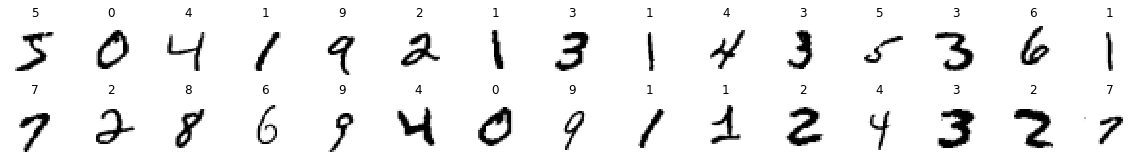

In [2]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(y)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

<p style="page-break-after:always;"></p>

### 5.1.2 EMNIST

[**Extended MNIST (EMNIST):**](https://www.nist.gov/itl/iad/image-group/emnist-dataset) $\;$ corpus de $814\,255$ imágenes $28\times 28$ en gris de 62 caracteres manuscritos ([0-9], [a-z] y [A-Z])
* Como su nombre indica, se trata de una extensión de MNIST; de hecho, se publicó en 2017 al constatar que MNIST estaba agotado
* No se presenta como un único conjunto de imágenes, sino como una colección de 6 conjuntos o tareas distintas: 
    * Balanced: $814\,255$ caracteres, $47$ clases balanceadas
    * ByClass: $814\,255$ caracteres, $62$ clases no balanceadas
    * ByMerge:  $814\,255$ caracteres, $47$ clases no balanceadas
    * Digits: $280\,000$ caracteres, $10$ clases balanceadas
    * Letters: $145\,600$ caracteres, $26$ clases balanceadas
    * MNIST: $70\,000$ caracteres, $10$ clases balanceadas

**Ejemplo:** $\;$ lectura de EMNIST con la [librería emnist](https://pypi.org/project/emnist)

In [3]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples, extract_test_samples
dataset = 'byclass'
X_train, y_train = extract_training_samples(dataset)
X_test, y_test = extract_test_samples(dataset)
print(dataset, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

byclass (697932, 28, 28) (697932,) (116323, 28, 28) (116323,)


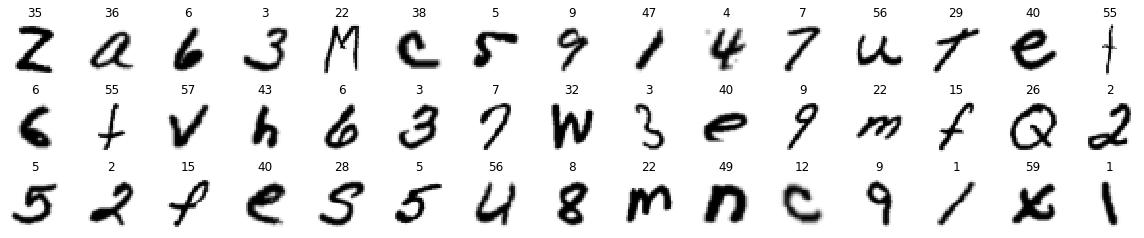

In [5]:
import matplotlib.pyplot as plt
nrows = 3; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); ax.set_title(f"{y}"); ax.imshow(x, cmap=plt.cm.gray_r, interpolation="none")

<p style="page-break-after:always;"></p>

### 5.1.3 Fashion-MNIST

[**Fashion-MNIST:**](https://github.com/zalandoresearch/fashion-mnist) $\;$ corpus de $70\,000$ imágenes $28\times 28$ en gris de 10 prendas de ropa; $60\,000$ de training y $10\,000$ de test
* Su formato es idéntico a MNIST pues, al igual que EMNIST, se publicó en 2017 como tarea continuadora de la ya agotada MNIST

**Ejemplo:** $\;$ lectura de Fashion-MNIST con fetch_openml de sklearn

In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
fashion_mnist_X, fashion_mnist_y = fetch_openml('Fashion-MNIST', return_X_y=True, as_frame=False, parser='auto')
X_train = fashion_mnist_X[:60000].astype(np.float32); y_train = fashion_mnist_y[:60000].astype(np.uint8)
X_test = fashion_mnist_X[60000:].astype(np.float32); y_test = fashion_mnist_y[60000:].astype(np.uint8)
labels = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


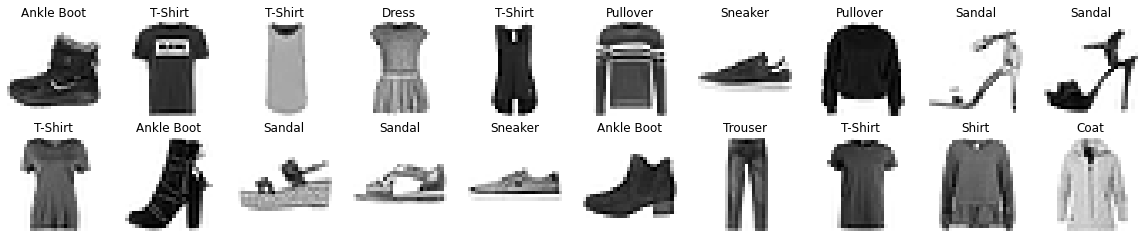

In [7]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(labels[y])
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

<p style="page-break-after:always;"></p>

### 5.1.4 CIFAR-10 y CIFAR-100

[**CIFAR-10:**](https://www.cs.toronto.edu/~kriz/cifar.html) $\;$ corpus de $60\,000$ imágenes $32\times 32$ a color de 10 clases, con $6\,000$ imágenes por clase; $50\,000$ de training y $10\,000$ de test

* Publicado en 2009, CIFAR-10 es uno de los [corpus más populares en ML de los últimos años](https://paperswithcode.com/datasets?q=&v=lst&o=cited)

[**CIFAR-100:**](https://www.cs.toronto.edu/~kriz/cifar.html) $\;$ como CIFAR-10, salvo que comprende 100 clases, con $600$ imágenes por clase

**Ejemplo:** $\;$ lectura de CIFAR-10 y CIFAR-100

In [8]:
import numpy as np
from sklearn.datasets import fetch_openml
cifar_10_X, cifar_10_y = fetch_openml('CIFAR_10', return_X_y=True, as_frame=False, parser='auto')
X_train = cifar_10_X[:50000]; y_train = cifar_10_y[:50000].astype('uint8')
X_test = cifar_10_X[50000:]; y_test = cifar_10_y[50000:].astype('uint8')
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


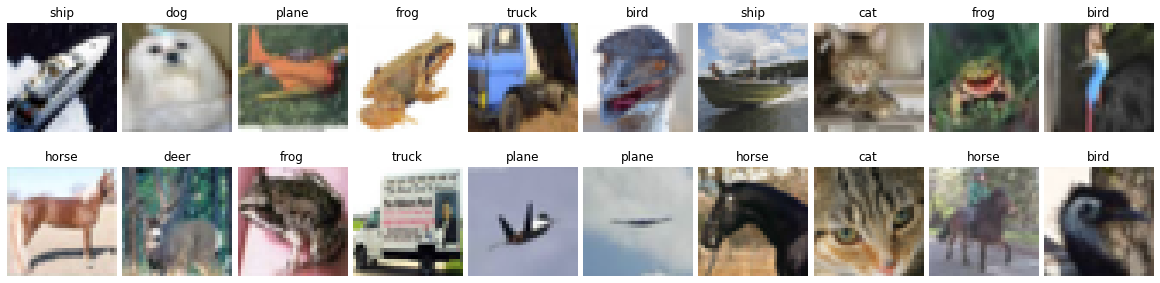

In [9]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 20*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(3, 32, 32).transpose(1, 2, 0); ax.set_title(labels[y])
    ax.imshow(image, interpolation="none")

<p style="page-break-after:always;"></p>

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
cifar_100_X, cifar_100_y = fetch_openml('CIFAR-100', return_X_y=True, as_frame=False, parser='auto')
X_train = cifar_100_X[:50000]; y_train = cifar_100_y[:50000].astype('uint8')
X_test = cifar_100_X[50000:]; y_test = cifar_100_y[50000:].astype('uint8')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


In [11]:
fine_labels = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle',
    'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar',
    'cattle', 'chair',  'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo',
    'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 
    'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 
    'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper',
    'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 
    'willow_tree', 'wolf', 'woman', 'worm')
coarse_labels = ('aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 
    'household electrical device', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees',
    'vehicles 1', 'vehicles 2')
fine2coarse = (4, 1, 14, 8, 0, 6, 7, 7, 18, 3, 3, 14, 9, 18, 7, 11, 3, 9, 7, 11, 6, 11, 5, 10, 7, 6, 13, 
    15, 3, 15, 0, 11, 1, 10, 12, 14, 16, 9, 11, 5, 5, 19, 8, 8, 15, 13, 14, 17, 18, 10, 16, 4, 17, 4, 2, 
    0, 17, 4, 18, 17, 10, 3, 2, 12, 12, 16, 12, 1, 9, 19, 2, 10, 0, 1, 16, 12, 9, 13, 15, 13, 16, 19, 2, 
    4, 6, 19, 5, 5, 8, 19, 18, 1, 2, 15, 6, 0, 17, 8, 14, 13)

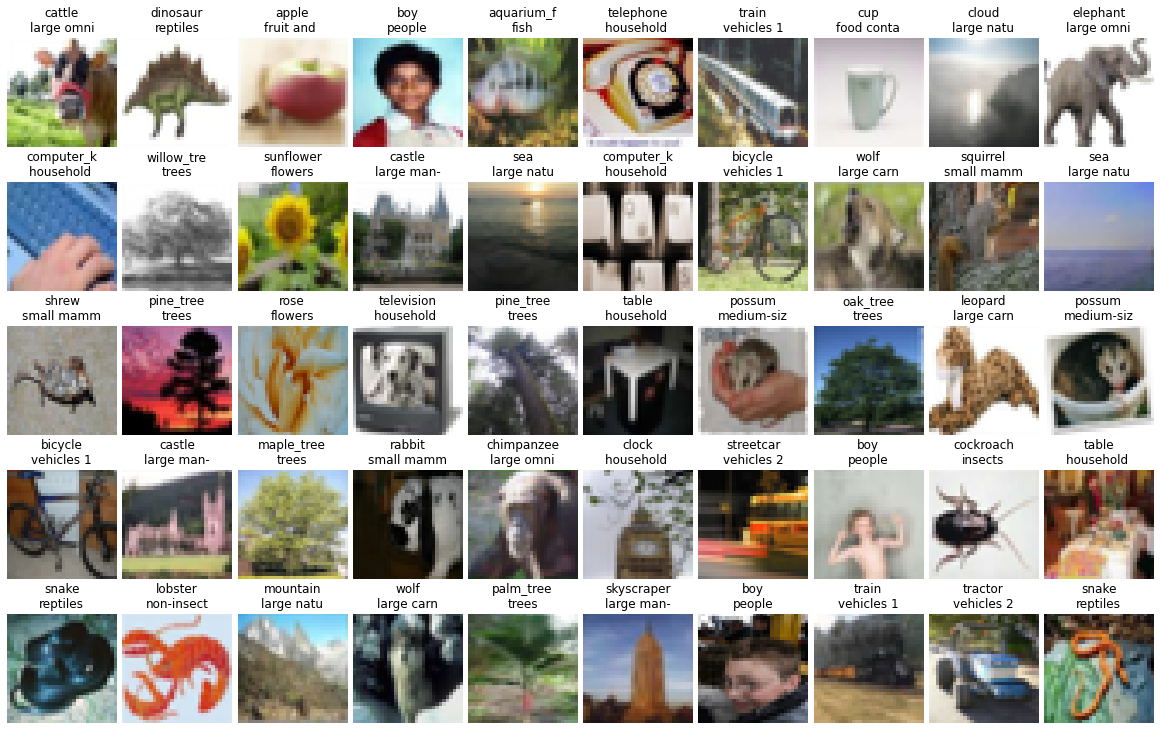

In [12]:
import matplotlib.pyplot as plt
nrows = 5; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 20*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(3, 32, 32).transpose(1, 2, 0); 
    ax.set_title(fine_labels[y][:10]+ "\n" + coarse_labels[fine2coarse[y]][:10])
    ax.imshow(image, interpolation="none")

<p style="page-break-after:always;"></p>

### 5.1.5 ImageNet

[**ImageNet:**](https://image-net.org) $\;$ corpus de $14\,197\,122$ imágenes anotadas de acuerdo con la [jerarquía WordNet](https://wordnet.princeton.edu)
* Al igual que CIFAR-10, se publicó en 2009 y es uno de los [corpus más populares en ML de los últimos años](https://paperswithcode.com/datasets?q=&v=lst&o=cited)
* Gran parte de su popularidad se debe a que sirvió de base en la competición **ImageNet Large Scale Visual Recognition Challenge (ILSVRC),** de 2010 a 2017, para la evaluación de algoritmos de detección de objetos y clasificación de imágenes a gran escala
* Aunque se considera prácticamente "saturado", ImageNet y diversos subconjuntos del mismo se siguen empleando como tareas de referencia; veáse por ejemplo en [huggingface](https://huggingface.co/datasets?sort=downloads&search=imagenet)

<p style="page-break-after:always;"></p>

## 5.2 Algunos conjuntos de texto comunes

**Procesamiento del lenguaje natural (NLP, natural language processing):** $\;$ incluye gran variedad de tareas sobre texto en las que el ML obtiene grandes resultados

### 5.2.1 Clasificación de texto

**Clasificación de texto:** $\;$ una tarea sencilla para aplicaciones como el **filtrado de correo spam** y el **análisis de sentimiento,** esto es, de la polaridad positiva o negativa de la opinión expresada en un texto

**Ejemplo:** $\;$ el **IMDB movie review dataset** contiene 50K revisiones (+ o -) de películas; mitad para entrenamiento y mitad de test:
* this film was just brilliant casting location... (+)
* big hair big boobs bad music and a giant safety... (-)

<p style="page-break-after:always;"></p>

### 5.2.2 Traducción automática

**Traducción automática (MT, machine translation):** $\;$ estudia la automatización de la traducción de textos (o habla) entre idiomas

**Textos paralelos:** $\;$ colecciones de pares ejemplos de traducción que los sistemas más avanzados emplean para entrenar DNNs

**Ejemplo:** $\;$ el corpus [Europarl v10](https://www.statmt.org/europarl/v10/training) con ejemplos EsPt, DeEn, FrEn, etc.

| Lengua fuente                                                                  | Lengua destino                                                                     |
|--------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| Ratificación y ampliación de los convenios actualizados de la OIT (votación)   | Ratificação e aplicação das convenções que a OIT considerou actualizadas (votação) |
| Ratifizierung und Umsetzung der aktualisierten IAO-Übereinkommen (Abstimmung)  | The ratification and implementation of the updated ILO conventions (vote)          |
| Ratification et mise en œuvre des conventions de l'OIT mises à jour (vote)     | The ratification and implementation of the updated ILO conventions (vote)          |

<p style="page-break-after:always;"></p>

### 5.2.3 Otras tareas seq2seq

**seq2seq:** $\;$ generalización de MT que estudia el aprendizaje de una transformación de una secuencia (de entrada) $\boldsymbol{x}$ en otra (de salida) $\boldsymbol{y}$

**Tareas seq2seq:** $\;$ **resumen (automático) de documentos,** **búsqueda de respuestas (question answering),** etc.

**Ejemplo:** $\;$ el corpus **Stanford Question Answering Dataset (SQuAD)** incluye 100K preguntas sobre pasajes (texto) de Wikipedia

> T: In meteorology, precipitation is any product of the condensation of atmospheric water vapor that falls under <span style="color:blue">gravity</span>. The
> main forms of precipitation include drizzle, rain, sleet, snow, <span style="color:red">graupel</span> and hail... Precipitation forms as smaller droplets
> coalesce via collision with other rain drops or ice crystals <span style="color:orange">within a cloud</span>. Short, intense periods of rain in scattered
> locations are called “showers”.

> Q1: What causes precipitation to fall? A1: <span style="color:blue">gravity</span>

> Q2: What is another main form of precipitation besides drizzle, rain, snow, sleet and hail? A2: <span style="color:red">graupel</span>

> Q3: Where do water droplets collide with ice crystals to form precipitation? A3: <span style="color:orange">within a cloud</span>

<p style="page-break-after:always;"></p>

### 5.2.4 Modelado del lenguaje

**Language modeling (LM):** $\;$ estudia cómo aprender un modelo incondicional, $p(\boldsymbol{x})$, siendo $\boldsymbol{x}$ un texto de entrada sin salida correspondiente, por lo que puede decirse que se trata de una tarea de aprendizaje no supervisado

**Textos monolíngües:** $\;$ LM suele hacer uso de grandes colecciones de textos monolíngües que, al igual que en muchas otras tareas de aprendizaje no supervisado, son datos no supervisados fáciles de conseguir

**n-gramas:** $\;$ modelos de lenguaje estadísticos que se limitan a estimar $p(\boldsymbol{x})$ a partir de tablas de cuentas de secuencias de $n$ palabras; han sido los modelos dominantes durante décadas (desde los 60)

**Modelos de lenguaje neuronales:** $\;$ modelos de lenguaje basados en DNNs entrenadas con el mayor número posible de ejemplos; son los modelos que obtienen mejores resultados actualmente

**Modelos de lenguaje condicionales:** $\;$ si el modelo de lenguaje genera una salida en respuesta a una entrada dada (prompt), como en seq2seq, podemos verlo como un modelo generativo condicional

**Generación de lenguaje natural (NLG, natural language generation):** $\;$ área NLP muy popular tras el desarrollo del grandes modelos de lenguaje condicionales para resumen automático de documentos, búsqueda de respuestas, subtitulado de imágenes, diálogo (chatbots), escritura creativa y humor computacional, etc.

<p style="page-break-after:always;"></p>

## 5.3 Preproceso de datos de entrada discretos

### 5.3.1 Codificación one-hot

**Codificación one-hot o dummy (ficticia):** $\;$ de una variable categórica $x$ que puede tomar $K$ valores
$$\operatorname{one-hot}(x)=[\mathbb{I}(x=1),\dotsc,\mathbb{I}(x=K)]$$

**Ejemplo:** si $x$ puede valer R, G o B
$$\begin{align*}
\operatorname{one-hot}(R)&=[1, 0, 0]\\%
\operatorname{one-hot}(G)&=[0, 1, 0]\\%
\operatorname{one-hot}(B)&=[0, 0, 1]%
\end{align*}$$

### 5.3.2 Cruce de variables

**Limitaciones de las codificaciones one-hot:** $\;$ si se tiene un modelo lineal para múltiples variables categóricas de entrada, las codificaciones one-hot permite capturar los efectos principales de cada variable, pero no los de interacción entre ellas

**Cruces de variables (feature crosses):** $\;$ si se tiene un modelo lineal para múltiples variables categóricas de entrada, facilitan la captura de interacciones entre las variables de entrada mediante la introducción de nuevas variables que las cruzan

**Ejemplo:** $\;$ eficiencia de un vehículo con dos variables más una tercera que las cruza
$$\begin{align*}
x_1\in\{S, T, F\}:&\;\text{tipo; SUV, Truck o Family car}\\%
x_2\in\{U, J\}:&\;\text{origen; USA o Japón}\\%
x_3\in\{S, T, F\}\times\{U, J\}:&\;\text{cruce de $x_1$ y $x_2$}%
\end{align*}$$

<p style="page-break-after:always;"></p>

## 5.4 Preproceso de texto

Aspectos a considerar para trabajar con (documentos de) texto:
* Los documentos puede ser de diferentes longitudes, por lo que no podemos tratarlos directamente como vectores de características de dimensión fija.
* Las palabras son variables categóricas con muchos valores posibles (la talla del vocabulario), por lo que sus codificaciones one-hot son de muy alta dimensión y sin noción de similitud natural.
* **Out-of-vocabulary (OOV) words:** podemos encontrar palabras en test que no hayan sido vistas en entrenamiento.

### 5.4.1 El modelo bolsa de palabras

El modelo **bag of words** ignora el orden de las palabras en un documento, reduciéndolo a un vector de cuentas (de ocurrencias) de cada **palabra, término o token** en un vocabulario fijo de referencia. Para fijar un vocabulario de referencia de talla reducida, se suelen aplicar varias técnicas de preproceso como: eliminación de signos de puntuación, **lowercasing** (conversión a minúsculas), **stop word removal** (supresión de palabras funcionales) y **word stemming** (lematización).
Llamamos **vector space model** al modelo de representación de documentos que resulta: un espacio vectorial en el que cada documento viene representado mediante un vector de $D$ dimensiones. Formalmente, dado un documento $n$ de longitud $T_n$ y con token $x_{nt}$ en la posición $t$, su representación vectorial, $\tilde{\boldsymbol{x}}_n$, incluye el número de ocurrencias de cada palabra $v$ del vocabulario:
$$\tilde{x}_{nv}=\sum_{t=1}^{T_n}\mathbb{I}(x_{nt}=v)$$
Llamamos **term frequency matrix** a la matriz $D\times N$ donde $\text{TF}_{ij}$ es la frecuencia del término $i$ en el documento $j$.

<p style="page-break-after:always;"></p>

**Ejemplo:** matriz TF con $D=N=20$; los píxeles más oscuros indican términos más frecuentes
<div align="center"><img src="Figure_1.15.png"/></div>

<p style="page-break-after:always;"></p>

### 5.4.2 Representación TF-IDF

La **representación TF-IDF** es una representación clásica de documentos de texto que mejora la TF (bag of words).

Por un lado, sustituye la TF por la **TF log-escalada** para restar importancia a los términos más frecuentes pues, por lo general, tienen poca carga semántica:
$$\log(\operatorname{TF}_{ij}+1)$$

Por otro lado, introduce la **inverse document frequency (IDF)** para estimar la importancia de un término $i$ en proporción inversa al número de documentos que lo incluyen, $\operatorname{DF}_i$, también log-escalada:
$$\operatorname{IDF}_i=\log\frac{N}{1+\operatorname{DF}_i}$$

La TF-IDF combina la TF log-escalada con la IDF:
$$\operatorname{TFIDF}_{ij}=\log(\operatorname{TF}_{ij}+1)\cdot\operatorname{IDF}_i$$

Aunque la TF-IDF mejora la TF dando más peso a las palabras más informativas, esta representación no tiene en cuenta que una mayor proximidad espacial de las palabras debería indicar mayor similitud semántica, cosa (implícitamente) asumida por la mayoría de modelos predictivos.

<p style="page-break-after:always;"></p>

### 5.4.3 Word embeddings

Sea $\boldsymbol{x}_{nt}\in\{0,1\}^V$ la $t$-ésima palabra del $n$-ésimo documento, representada con un vector disperso one-hot sobre un vocabulario de $V$ palabras. Llamamos **word embedding** de $\boldsymbol{x}_{nt}$ a su transformación en un vector denso de dimensión $K$ reducida, $\boldsymbol{e}_{nt}=\mathbf{E}\,\boldsymbol{x}_{nt}$, donde $\mathbf{E}\in\mathbb{R}^{K\times V}$ es una matriz aprendida para que la proximidad vectorial indique similitud semántica. Por extensión, llamamos **bag of word embeddings** a la suma (o promedio) de los word embeddings de todas sus palabras:
$$\bar{\boldsymbol{e}}_n%
=\sum_{t=1}^{T_n}\boldsymbol{e}_{nt}%
=\mathbf{E}\sum_{t=1}^{T_n}\boldsymbol{x}_{nt}%
=\mathbf{E}\,\tilde{\boldsymbol{x}}_n$$
La bolsa de word embeddings puede integrarse fácilmente en un modelo de regresión logística:
$$p(y=c\mid\boldsymbol{x}; \boldsymbol{\theta})=\mathcal{S}_c(\mathbf{WE}\tilde{\boldsymbol{x}}_n)$$
Además, si se emplea una matriz $\mathbf{E}$ **pre-entrenada,** el modelo es lineal con $\mathbf{W}$ y se simplifica el aprendizaje.

### 5.4.4 Palabras fuera de vocabulario

Llamamos **palabras fuera del vocabulario (OOV, out-of-vocabulary)** a palabras encontradas en test que no han sido vistas en entrenamiento; por ejemplo, nombres propios de personas y lugares.

Un heurístico convencional para tratar las palabras OOV consiste en reemplazarlas por un símbolo especial, UNK. Ahora bien, este heurístico renuncia a adivinar parte del significado al menos. Por ejemplo, de amaxofobia (miedo a conducir un vehículo o viajar en él) podríamos adivinar que significa aversión exagerada a alguien o algo gracias al sufijo.

Para adivinar al menos una parte del significado de una palabra desconocida, la alternativa usual al UNK consiste en emplear vocabularios de sub-palabras obtenidos con técnicas de codificación como **byte-pair encoding (BPE).**

<p style="page-break-after:always;"></p>

## 5.5 Datos perdidos

**Mecanismos que producen datos perdidos:** $\;$ condicionan el tratamiento de los mismos en una matriz de datos
* **Missing completely at random (MCAR):** $\;$ completamente al azar
* **Missing at random (MAR):** $\;$ condicionados por los observados
* **Missing not at random (MNAR):** $\;$ no aleatorios; dependientes tanto de observados como perdidos

**MAR y MCAR más sencillos que MNAR:**
* En MAR y MCAR podemos ignorar el mecanismo que origina los datos perdidos pues no aporta información relevante sobre sus valores
* En MNAR conviene establecer un modelo del mecanismo pues la pérdida de datos está relacionada con sus posibles valores
* Por simplicidad, en ML solemos asumir un mecanismo MAR o, más simplemente, MCAR

**Eliminación de entradas con datos perdidos:** $\;$ si se tienen pocas entradas con datos perdidos, la opción más sencilla es descartarlas

**Imputación del valor medio:** $\;$ el heurístico más común para completar (rellenar) un dato perdido consiste en imputar el valor medio de su característica correspondiente; este heurístico resulta especialmente apropiado en MCAR
    
**Modelos condicionales generativos:** $\;$ podemos ajustar un modelo generativo a las entradas que capture correlaciones entre características y usarlo para completar los datos perdidos; esta técnica tiene interés en MAR, esto es, cuando los datos perdidos están correlacionados con los observados

<p style="page-break-after:always;"></p>

# 6 Discusión

## 6.1 El aprendizaje automático y otras áreas

**Análisis predictivo (predictive analytics):** $\;$ similar al ML, se centra en aplicaciones de negocios como la administración de relaciones con el cliente, análisis de cobros y predicción de cartera

**Minería de datos:** $\;$ cubre tanto aprendizaje supervisado como no supervisado, pero se orienta a bases de datos (estructuradas)

**Ciencia de datos:** $\;$ emplea técnicas de ML y estadística, pero desde una óptica más estadística, haciendo énfasis en la integración y visualización de datos, así como en el papel del analista de datos y el análisis experto del dominio

**IA simbólica:** $\;$ basada en la lógica, el procesamiento de listas simbólicas y el conocimiento experto; decayó en los 90, la **IA moderna** es sinónimo de ML y redes neuronales

**Bases del ML:** $\;$ probabilidad, estadística, teorías de la decisión e información, algebra lineal y optimización

<p style="page-break-after:always;"></p>

## 6.2 Consideraciones

**Pirateo de recompensas (reward hacking):** $\;$ problema que se plantea cuando, tras entrenar un sistema de ML con una función de recompensa dada, nos damos cuenta que dicha función no incluye varias restricciones o preferencias que debíamos haber especificado

**Problema del alineamiento (alignment problem):** $\;$ el reward hacking es un ejemplo de un problema mucho mayor que, en términos generales, podemos describir como la discrepancia entre lo que pedimos a nuestros algoritmos que optimicen y lo que en realidad queremos que hagan por nosotros

**Ética y seguridad de la IA:** $\;$ el extraordinario avance de la IA en los últimos años ha provocado gran preocupación tanto por la eticidad de los sistemas desarrollados (lo que queremos que hagan y posibles usos) como por su seguridad (lo que realmente les hemos pedido y usos no deseados)

**Aprendizaje por refuerzo inverso:** $\;$ propone no especificar una función de recompensa explícita para atacar el problema del alineamiento; en su lugar, el sistema debe inferir la recompensa observando el comportamiento humano; un incoveniente obvio es que emular el comportamiento humano también puede conducir a usos no deseados

**Inteligencia artificial general (AGI, artificial general intelligence):** $\;$ la visión clásica de la IA establece que llegaremos a sistemas AGI mediante el desarrollo de sistemas cada vez más avanzados, que tomen decisiones por su cuenta, sin intervención humana

**Inteligencia aumentada (augmented intelligence):** $\;$ visión alternativa de la IA según la cual los sistemas IA son herramientas inteligentes que mantienen el control humano en la toma de decisiones; aunque las herramientas IA sean cada vez más autonómas, el objetivo es facilitar el trabajo de las personas, no emularlas o superarlas

**Regulación de la IA:** $\;$ desde junio de 2023, el uso de la IA en la UE está regulado por la Ley de Inteligencia Artificial, la cual establece obligaciones para proveedores y usuarios en función del nivel de riesgo de la IA (inaceptable, alto y limitado)